# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load Data Warehouse

In [2]:
# Load birth and unemployment data into DataFrame (tidy_warehouse)
tidy_warehouse_df = pd.read_csv('../tidy_data/tidy_warehouse.csv')
tidy_warehouse_df.sort_values(by='year', inplace=True)

In [3]:
# Display info
tidy_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 9 columns):
year                         68 non-null int64
1_4_years                    68 non-null float64
10_14_years                  68 non-null float64
15_19_years                  68 non-null float64
5_9_years                    68 non-null float64
average_unemployment_rate    68 non-null float64
number_of_births             68 non-null int64
general_fertility_rate       68 non-null float64
crude_birth_rate             68 non-null float64
dtypes: float64(7), int64(2)
memory usage: 5.3 KB


In [4]:
# Display top 5 rows
tidy_warehouse_df.head()

,year,1_4_years,10_14_years,15_19_years,5_9_years,average_unemployment_rate,number_of_births,general_fertility_rate,crude_birth_rate
0,1948,160.1,65.6,118.7,70.6,3.750000,3637000,107.3,24.9
1,1949,150.2,63.6,111.8,68.2,6.050000,3649000,107.1,24.5
2,1950,139.4,58.1,108.6,61.7,5.208333,3632000,106.2,24.1
3,1951,136.9,56.4,108.9,61.7,3.283333,3820000,111.5,24.9
4,1952,141.1,56.8,114.4,61.3,3.025000,3909000,113.9,25.1


# Exploratory Questions

### What date range is available in the merged data?

In [5]:
# Display date range
print('Start Date:', tidy_warehouse_df.iloc[0].values)
print('End Date  :', tidy_warehouse_df.iloc[-1].values)

Start Date: [1.948e+03 1.601e+02 6.560e+01 1.187e+02 7.060e+01 3.750e+00 3.637e+06
 1.073e+02 2.490e+01]
End Date  : [2.01500000e+03 2.49000000e+01 1.46000000e+01 4.83000000e+01
 1.17000000e+01 5.26666667e+00 3.97849700e+06 6.25000000e+01
 1.24000000e+01]


### How many missing values are there?

In [6]:
# Count the number of missing values in each column
pd.isnull(tidy_warehouse_df).sum()

year                         0
1_4_years                    0
10_14_years                  0
15_19_years                  0
5_9_years                    0
average_unemployment_rate    0
number_of_births             0
general_fertility_rate       0
crude_birth_rate             0
dtype: int64

### How is each variable changing with time?

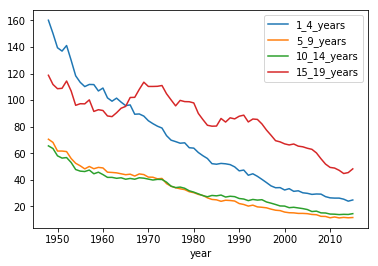

In [7]:
# Plot line plot of death rate for each age group
fig, ax = plt.subplots()
tidy_warehouse_df.plot(x='year', y=['1_4_years', '5_9_years', '10_14_years', '15_19_years'], ax=ax)

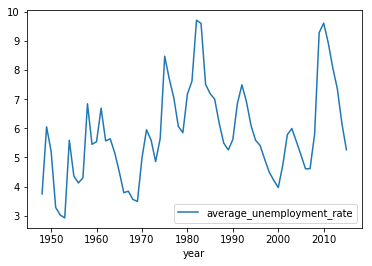

In [8]:
# Plot line plot of unemployment rate
fig, ax = plt.subplots()
tidy_warehouse_df.plot(x='year', y='average_unemployment_rate', ax=ax)

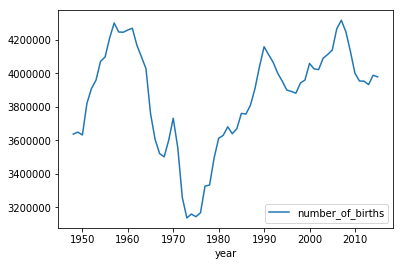

In [9]:
# Plot line plot of number of births
fig, ax = plt.subplots()
tidy_warehouse_df.plot(x='year', y='number_of_births', ax=ax)

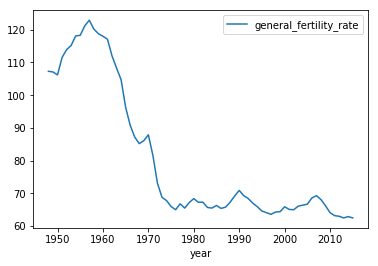

In [10]:
# Plot line plot of general fertility rate
fig, ax = plt.subplots()
tidy_warehouse_df.plot(x='year', y='general_fertility_rate', ax=ax)

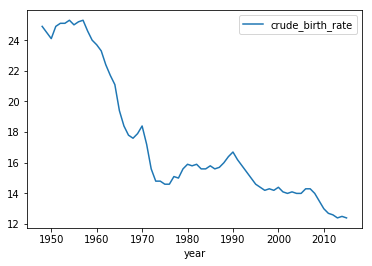

In [11]:
# Plot line plot of crude birth rate
fig, ax = plt.subplots()
tidy_warehouse_df.plot(x='year', y='crude_birth_rate', ax=ax)

### How is birth data before and after 1975 different?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0c6ac8>,
      dtype=object)

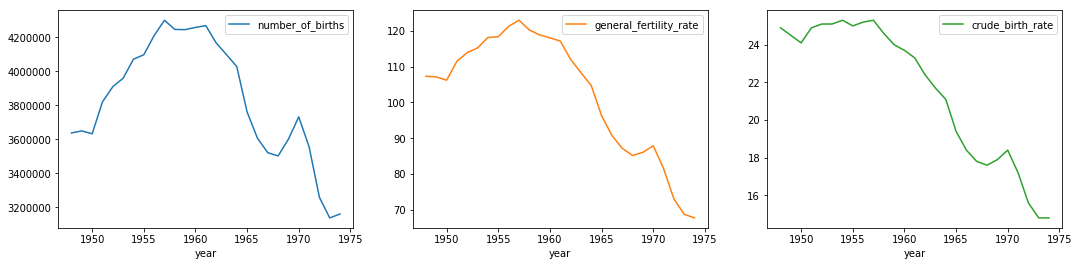

In [12]:
# Plot birth data before 1975
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18, 4))
tidy_warehouse_df[tidy_warehouse_df['year'] < 1975].plot(x='year', y=['number_of_births', 'general_fertility_rate', 'crude_birth_rate'], ax=ax, subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d3a09b0>,
      dtype=object)

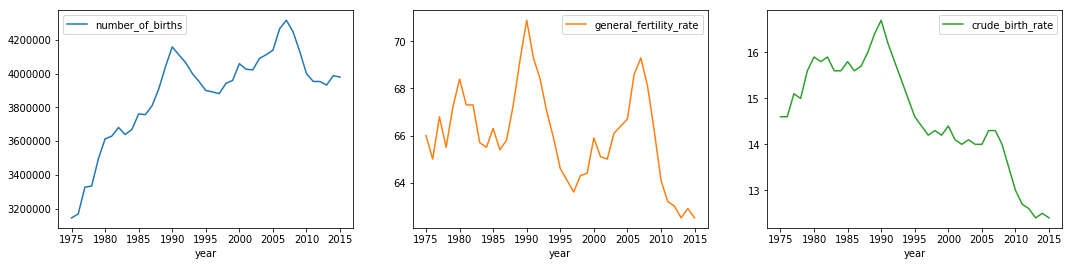

In [13]:
# Plot birth data after 1975
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18, 4))
tidy_warehouse_df[tidy_warehouse_df['year'] >= 1975].plot(x='year', y=['number_of_births', 'general_fertility_rate', 'crude_birth_rate'], ax=ax, subplots=True)

### How do trends line up?

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


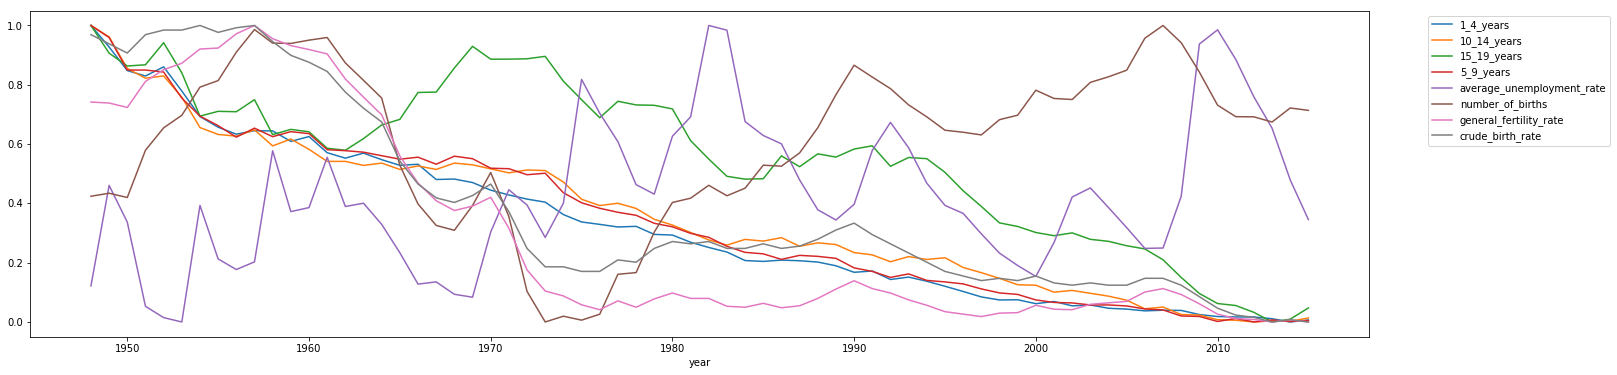

In [15]:
# Create a copy of tidy_warehouse_df to be scaled
scaled_warehouse_df = tidy_warehouse_df.copy()

# Create a list of columns to be scaled
scaled_columns = scaled_warehouse_df.columns
scaled_columns = scaled_columns[scaled_columns != 'year']

# Scale each column using MinMaxScaler
scaler = MinMaxScaler()
for column in scaled_columns:
    scaled_warehouse_df[column] = scaler.fit_transform(scaled_warehouse_df[column].values.reshape(-1, 1))

# Plot normalized values (between 0 and 1) for each column
fig, ax = plt.subplots(figsize=(24, 6))
scaled_warehouse_df.plot(x='year', y=scaled_columns, ax=ax)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")